
Transactions Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070   

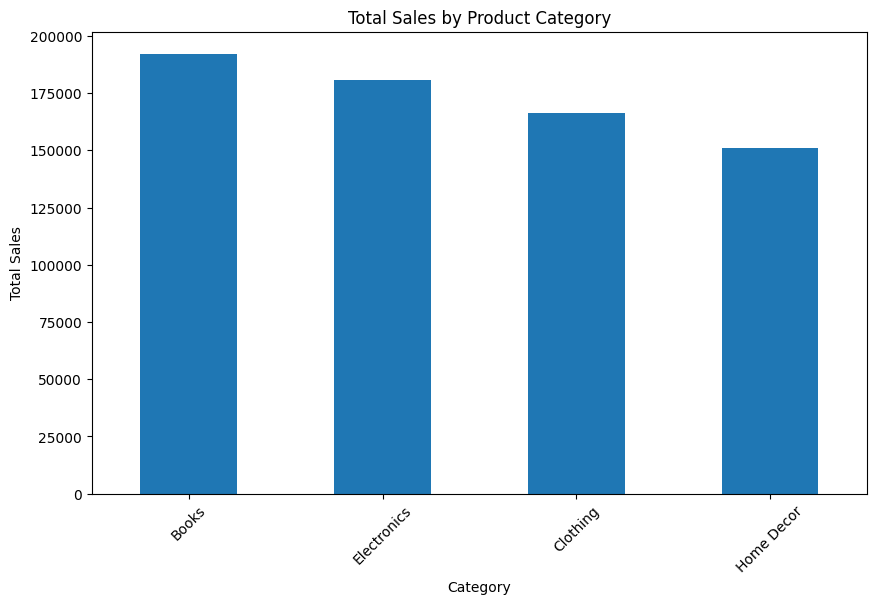

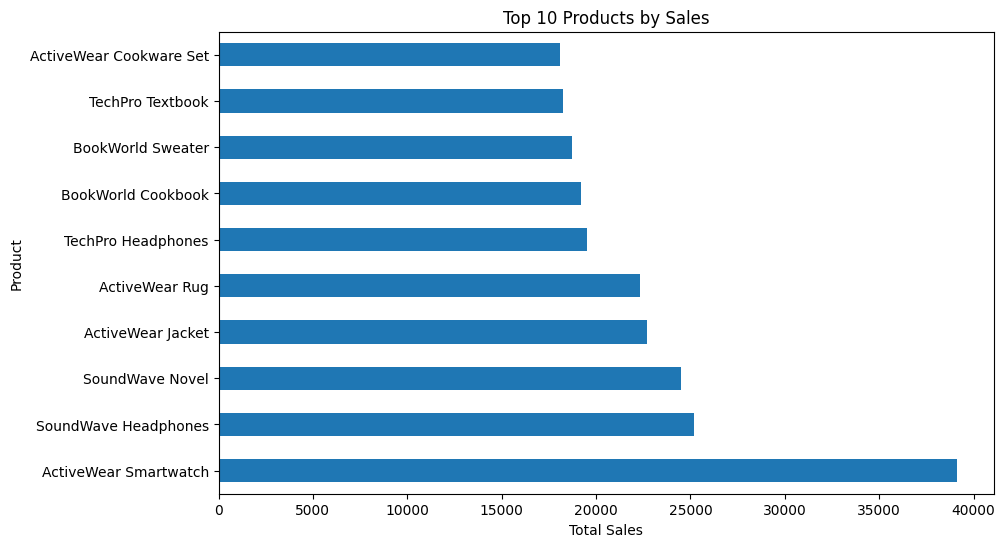

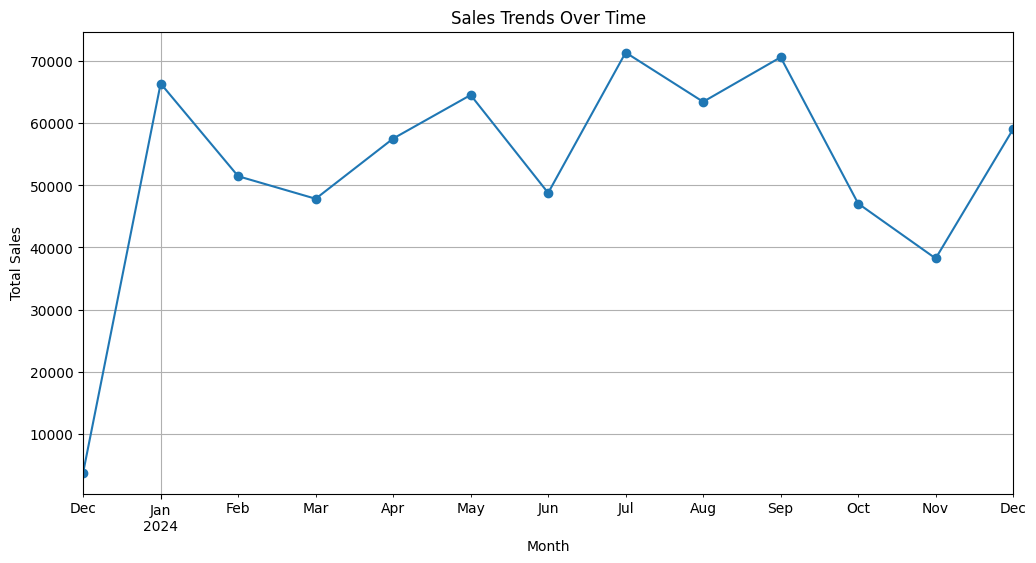

<ipython-input-2-f908dd62ba13>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False).index,


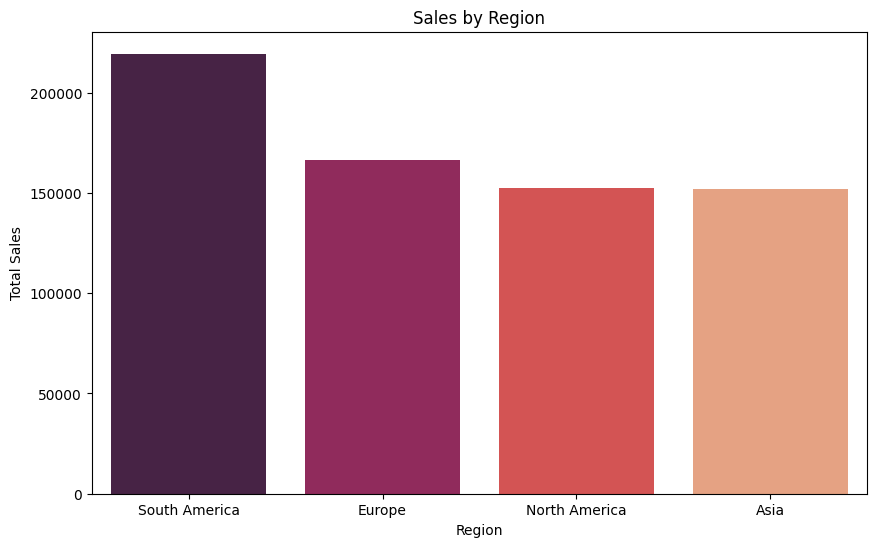

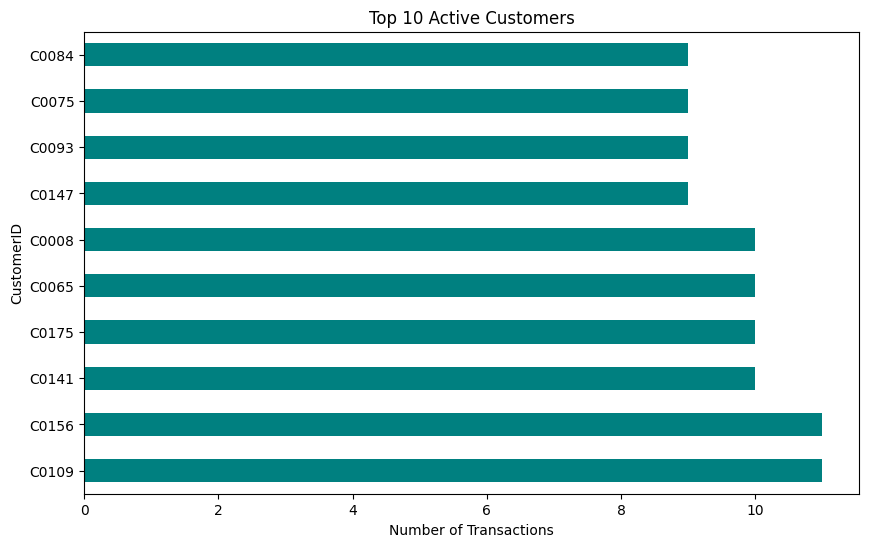

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

# 1. Basic Data Overview
def dataset_overview(df, name):
    print(f"\n{name} Dataset Info:\n")
    print(df.info())
    print(df.head())
    print(f"\n{name} Summary:\n")
    print(df.describe(include='all'))

dataset_overview(transactions, "Transactions")
dataset_overview(products, "Products")
dataset_overview(customers, "Customers")

# 2. Missing Values
print("\nMissing Values Check:")
print(f"Transactions:\n{transactions.isnull().sum()}\n")
print(f"Products:\n{products.isnull().sum()}\n")
print(f"Customers:\n{customers.isnull().sum()}\n")

# 3. Merging Datasets
merged_data = pd.merge(pd.merge(transactions, products, on='ProductID', how='left'),
                       customers, on='CustomerID', how='left')

# 4. Key Insights Exploration
## Sales Distribution by Category
plt.figure(figsize=(10, 6))
merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()

## Top 10 Products by Sales
plt.figure(figsize=(10, 6))
merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

## Sales Trends Over Time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'], errors='coerce')
merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Sales Trends Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

## Regional Sales Distribution
plt.figure(figsize=(10, 6))
# Use Seaborn's barplot
sns.barplot(x=merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False).index,
            y=merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False).values,
            palette="rocket")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.show()

## Customer Activity Analysis
plt.figure(figsize=(10, 6))
merged_data['CustomerID'].value_counts().head(10).plot(kind='barh', color='teal') # Changed 'mako' to 'teal', a valid Matplotlib color
plt.title("Top 10 Active Customers")
plt.xlabel("Number of Transactions")
plt.ylabel("CustomerID")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')